# Lab 1

## Sravana Nuti 

## Wind Energy

### Part 1 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('turbines.csv')
df.head()

,Observation Number,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,1,01 01 2018 00:00,380.047790,5.311336,416.328908,259.994904
1,2,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,3,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,4,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,5,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


The total number of measurements is the total length of the dataframe. The length of the dataframe provides how many rows are present. Since each row represents the a measurement, the length of the dataframe is the total number of measurements.

In [3]:
length_df = len(df)
print(length_df)

50530


There are a total of 50530 measurements in this dataframe. 

In [4]:
columns = df.columns
values = pd.DataFrame(columns = ['Feature','Min','Mean', 'Median', 'Max', 'Std'])
for i in range(2,len(columns)):
    feature = columns[i]
    minimum = df[columns[i]].min()
    avg = df[columns[i]].mean()
    med = df[columns[i]].median()
    maximum = df[columns[i]].max()
    stdev = df[columns[i]].std()
    values = values.append({'Feature': feature, 'Min': minimum, 'Mean': avg, 'Median': med, 'Max': maximum, 'Std':stdev },ignore_index = True)
values

,Feature,Min,Mean,Median,Max,Std
0,LV ActivePower (kW),-2.471405,1307.684332,825.838074,3618.732910,1312.459242
1,Wind Speed (m/s),0.000000,7.557952,7.104594,25.206011,4.227166
2,Theoretical_Power_Curve (KWh),0.000000,1492.175463,1063.776282,3600.000000,1368.018238
3,Wind Direction (°),0.000000,123.687559,73.712978,359.997589,93.443736


This table provides the Minimum, Mean, Median, Maximum and Standard Deviation for each of the features that was measured. The features that have a mean and median that differ greater than 10% by using the percent change formula.  

In [5]:
for index, row in values.iterrows():
    change = abs((row['Mean'] - row['Median'])/row['Mean']*100)
    if (change>10.0):
        print(row['Feature'])

LV ActivePower (kW)
Theoretical_Power_Curve (KWh)
Wind Direction (°)


LV Active Power, Theoretical Power Curve, and Wind Direction features have mean and median that differ greater than 10% 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5EB502FD0>,
      dtype=object)

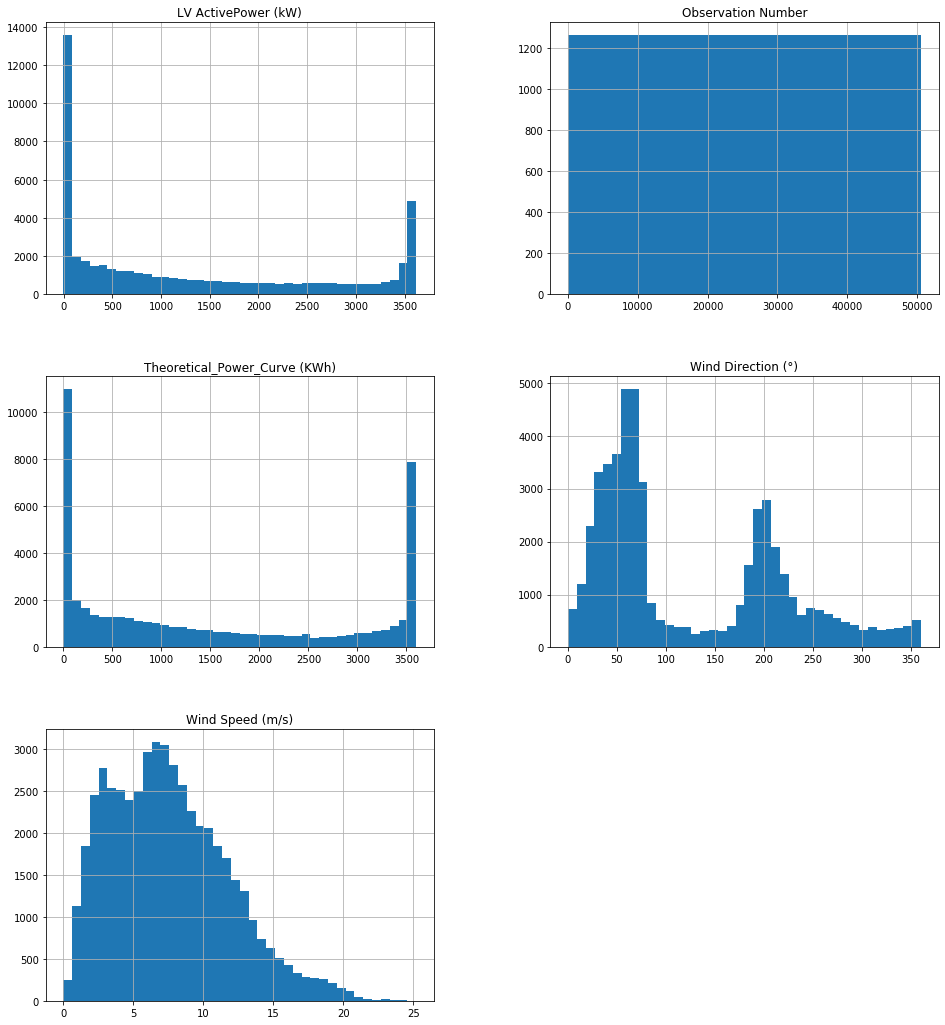

In [6]:
df.hist(figsize = (16,18), bins = 40)

Based on the histograms, the features LV Active Power, Theoretical Power Curve, and Wind Speed have a data distribution that is skewed to the right. Meaning that the data is shifted to the left. Wind Direction has data distribution shape that is bimodal. Due to the bias present in the Theoretical Power and Active Power, there is a significant difference in mean and median. Similarly, Wind Direction is also bimodal distribution with outliers present. This may explain why there is significant difference between the mean and median.  

In [7]:
df.describe()

,Observation Number,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
count,50530.000000,50530.000000,50530.000000,50530.000000,50530.000000
mean,25265.500000,1307.684332,7.557952,1492.175463,123.687559
std,14586.898888,1312.459242,4.227166,1368.018238,93.443736
min,1.000000,-2.471405,0.000000,0.000000,0.000000
25%,12633.250000,50.677890,4.201395,161.328167,49.315437
50%,25265.500000,825.838074,7.104594,1063.776282,73.712978
75%,37897.750000,2482.507569,10.300020,2964.972462,201.696720
max,50530.000000,3618.732910,25.206011,3600.000000,359.997589


Using this table it can be seen that the spread of LV Active Power and Theoretical Power Curve is quite large. This is due to the large standards deviation. The large spread could also explains the shape of the data distribution and the difference between the mean and the median. 

Text(0, 0.5, 'Wind Speed (m/s)')

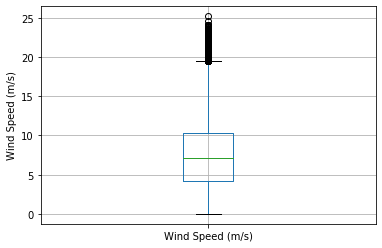

In [8]:
ax = df.boxplot(column= 'Wind Speed (m/s)')
ax.set_ylabel("Wind Speed (m/s)")

Text(0, 0.5, 'Actual Power (kW)')

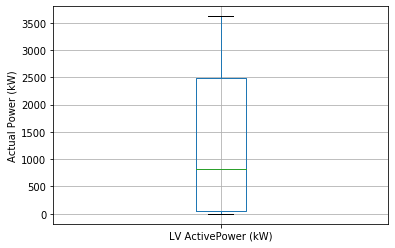

In [9]:
ax = df.boxplot(column= 'LV ActivePower (kW)')
ax.set_ylabel("Actual Power (kW)")

The shape of the data distribution is inpendent of the type of plot used to visualize the distribution. The same dataset will have the same distribution if the dataset was visualized in a Histogram and a Box Plot. Although, depending on the type of plot used to visualize a dataset, the distribution is easier to conlcude. 

The data distribution for Wind Speed based on the Box Plot is skewed to the right. The curve is shifted to the left side, towards the lower values. This is the same distribution that was noticed in the Histogram. 

The data distribution for LV Active Power based on the Box Plot is skewed to the right. The curve is shifted to the left side towards the lower value. This is same distribution that was noticed in the Historgram. 

In [10]:
def find_month(x):
    if " 01 " in x:
        return "Jan"
    elif " 02 " in x:
        return "Feb"
    elif " 03 " in x:
        return "March"    
    elif " 04 " in x:
        return "April"    
    elif " 05 " in x:
        return "May"    
    elif " 06 " in x:
        return "June"    
    elif " 07 " in x:
        return "July"    
    elif " 08 " in x:
        return "August"    
    elif " 09 " in x:
        return "Sep"    
    elif " 10 " in x:
        return "Oct"    
    elif " 11 " in x:
        return "Nov"    
    else:
        return "Dec"

In [11]:
df["Month"]=df["Date/Time"].apply(find_month)
df.groupby('Month').mean()

,Observation Number,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Month,,,,,
April,14465.0,824.358603,5.852096,955.690141,102.698848
August,31988.0,1978.188795,9.339899,2220.579161,52.473360
Dec,48307.0,1176.785881,7.357389,1424.063554,140.667803
Feb,5833.5,1503.355020,8.620697,1712.709958,143.353927
Jan,1909.0,1323.157951,8.550920,1847.287918,157.829495
July,27543.5,477.014298,4.950335,583.709297,120.400853
June,23189.0,995.490376,6.342205,1139.291376,130.566252
March,10081.0,1952.405766,9.734390,2075.819877,190.378235
May,18842.0,836.941996,5.859028,960.203607,136.501579


In [12]:
high_avg_speed = df.groupby('Month').mean().max()
print(high_avg_speed)

Observation Number               48307.000000
LV ActivePower (kW)               1978.188795
Wind Speed (m/s)                     9.734390
Theoretical_Power_Curve (KWh)     2220.579161
Wind Direction (°)                 190.378235
dtype: float64


From the table above it appears that the highest average speed is 9.734 m/s and the highest average power output is 1978.19 kW. This happens during the month of March. This is not what I would expect. I would expect the windiest months would be the hurricane seasons from August to October. However, based on the location of the wind mills they may have different weather patterns. 

### Part 2 

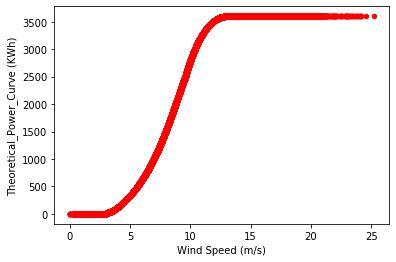

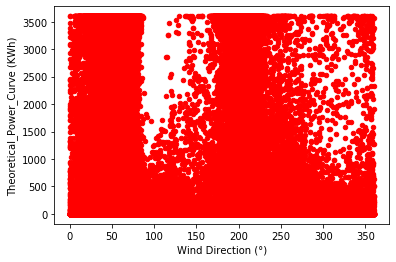

In [13]:
df.plot(kind='scatter',y='Theoretical_Power_Curve (KWh)',x='Wind Speed (m/s)',color='red')
df.plot(kind='scatter',y='Theoretical_Power_Curve (KWh)',x='Wind Direction (°)',color='red')

For the first graph of theoretical power versus wind speed, the independednt variable is the wind speed. The turbine spins at various speeds that is dependnt on the wind. Hence the output power is the dependednt on the Wind speed. This means that the x-axis would be the Wind speed and the y-axis will be the Theorietical power. Similarly, for the second graph, Wind Direction will be the x-axis and the Theoretical Power Outputted will the y-axis. 

From the two plots it is clear that Wind Speed has an effect on the power outputted because there is a correlation between both the variables. However, Wind Direction has no effect on the power outputted. There is no correlation between Wind Direction and the Theoretical Curve. 

From the Wind Speed vs. Power Outputted graph, it looks that there is a minimum amount of wind speed required to generate power. After which there is a clear positive correlatation. As the wind speed increases, the power outputted increases. However, after certain wind speeds, it seems that the power outputted is saturated. This can be seen by the flat plot towards the higher wind speeds.  

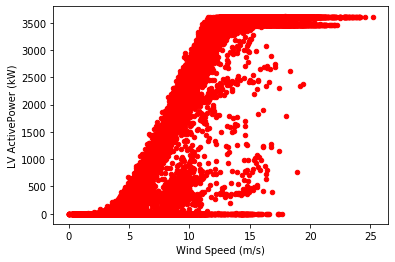

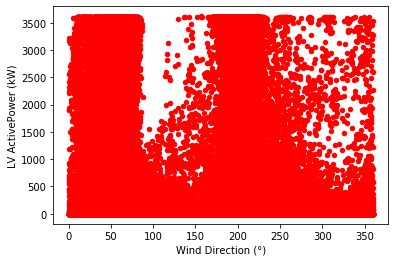

In [14]:
df.plot(kind='scatter',y='LV ActivePower (kW)',x='Wind Speed (m/s)',color='red')
df.plot(kind='scatter',y='LV ActivePower (kW)',x='Wind Direction (°)',color='red')

After plotting the actual power instead of the theoretical power, it seems that they follow the same trends. Wind Speed has the same effect on the actual power outputted as the theoretical power outputted. Both of the graphs have similar data distributions. Similarly, Wind Direction has no predictable shape for both actual power and theoretical power. 

The major difference between Theoretical Power graphs and the Actual Power graphs occur in the Wind Speed vs. Power Outputted graphs. In the first graph where Wind Speed was graphed against the Theoretical power, a very smooth graph can be visualized. There is a clear and distinct output for every distinct input. However, in the second graph where Wind Speed was graphed against the actual power, the shape is no longer a smooth S-shaped curve. Although the S-shape trend can be noticed, it longer has the one distinct output for one distinct input. Although this kind of a relationship is expected. Theoretical values are always differ than the actual values due to various other external factors that was considered during the computation of the thoeretical values. The difference in the graphs can be part of this phenomenon. 

In [15]:
df.corr()

,Observation Number,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
Observation Number,1.000000,0.029917,-0.013854,0.006009,-0.183999
LV ActivePower (kW),0.029917,1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),-0.013854,0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.006009,0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.183999,-0.062702,-0.077188,-0.099076,1.000000


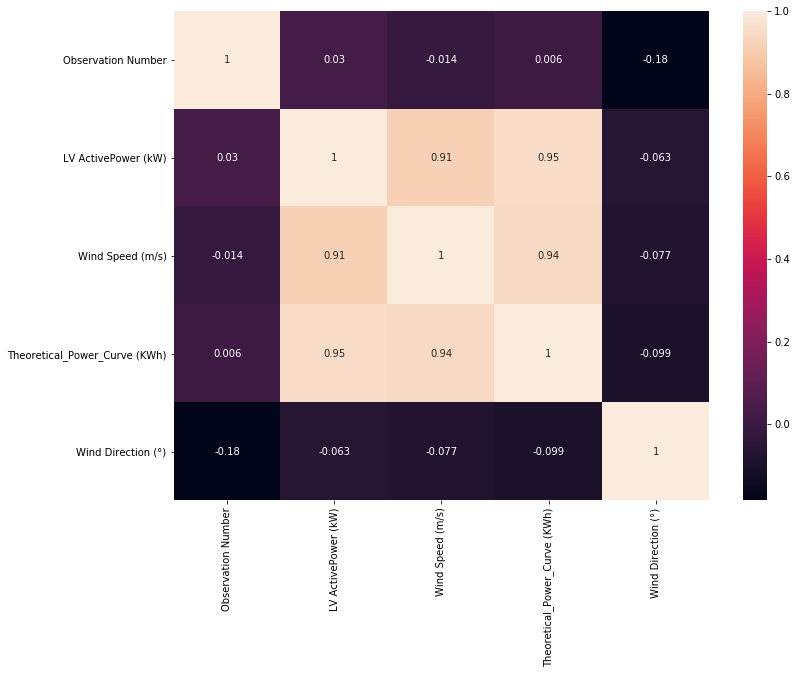

In [16]:
fig = plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True)
plt.show()

- wind speed and theoretical power curve:  0.944209
- wind direction and theoretical power curve:-0.099076	   
- wind speed and actual power curve: 0.949918  
- wind direction and actual power curve: -0.062702

These values agree with the scatter plots that were plotted previously. From the Scatter plot it was concluded that Wind Speed had a correlation with Actual power and theoretical power. However, wind direction did not have any sort of correlation between actual power and theoretical power. 

From the correlation table, wind speed and theoretical power curve has a correlation value of 0.94 and wind speed and actual power curve has a correlation value of 0.95. Both of these values indicate that there is a strong correlation between the variables. This is as we expected. However, from the correlation table, wind direction and theoretical power curve has a correlation value of -0.099076 and wind direction and actual power curve has a correlation value of -0.062702. The very low correlation values indicate that there is no relationship among the variables. This is also what we expected. 

### Part 3 

In [17]:
df['Loss [kW]'] = df['LV ActivePower (kW)'] - df['Theoretical_Power_Curve (KWh)']

In [18]:
df['Loss Percentage (%)'] = ((df['LV ActivePower (kW)'] - df['Theoretical_Power_Curve (KWh)'])/df['Theoretical_Power_Curve (KWh)'])*100

In [19]:
df

,Observation Number,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Month,Loss [kW],Loss Percentage (%)
0,1,01 01 2018 00:00,380.047790,5.311336,416.328908,259.994904,Jan,-36.281117,-8.714532
1,2,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,Jan,-66.148316,-12.722848
2,3,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,Jan,-84.523429,-21.622774
3,4,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087,Jan,-96.481665,-18.693375
4,5,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,Jan,-111.052276,-22.585236
5,6,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,Jan,-97.044387,-19.430780
6,7,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,Jan,-109.766650,-19.693594
7,8,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,Jan,-27.655991,-6.665730
8,9,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,Jan,-30.026437,-6.082195
9,10,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,Jan,-35.981075,-7.563709


As in all scenarios, the actual value varies with the theoretical value computed. These two columns calculate the theoretical error between the theoretical power outputted and the actual power that was outputted.  

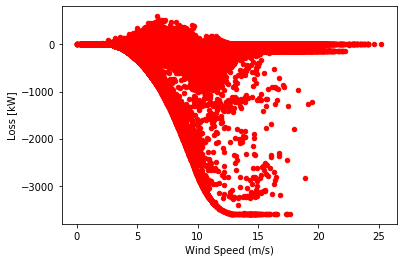

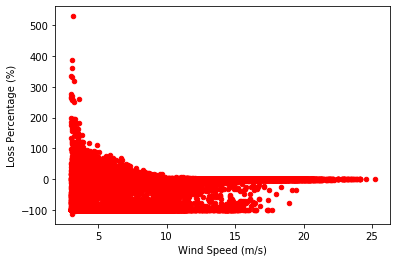

In [21]:
df.plot(kind='scatter',x='Wind Speed (m/s)',y='Loss [kW]',color='red')
df.plot(kind='scatter',y='Loss Percentage (%)',x='Wind Speed (m/s)',color='red')

It appears that certain wind speeds had a greater effect on the power loss. From the graph it can be seen that from wind speeds of 10m/s - 15m/s had a greater difference in theoretical power and actual power compared to other wind speeds.

The data set that was provided consists of four main features. These include LV ActivePower which is the power generated by the turbine measured in kW, Wind Speed which is the speed of the wind at the hub of the turbine measure in m/s, Theoretical Power Curve is the power that the turbine should generate measured in KWh, and Wind Direction is the direction of the wind at the hub of the turbine measured in degrees(°). The data set was collected through out a year from January to December. From a high level persepective, the average Active Power Outputted by the wind turbine is 1307.68 kW, the average Wind Speed is 7.56 m/s, the average Theoretical Power Curve is 1492 kWh and the average Wind Direction is 123.69°. Using plots such as histograms and box plots to visualize the data distribution LV Active Power, Theoretical Power Curve, and Wind Speed are skewed to the right. However, Wind Direction has a bimodal distribution. 

In this data set, there are two independednt variables and two dependent variables. The independedent variables are Wind Direction and Wind Speed. These two variables have a direct effect on the actual power generated (LV Active Power) and the theoretical power computed (Theoretical Power Curve). Wind Direction and Wind Speed effect the turbine and how it spins which indirectly effect the actual power and the theoretical power. To analyze the relationship between Wind Direction, Wind Speed and Power generated a correlation heat map was used. Based on the map, it seems that there is strong correlation between Wind Speed and Power(actual and theoretical). The correlation value between Wind Speed and LV Active Power is 0.95 which indicates a strond correlation. Similarly, the correlation value between Wind Speed and Theoretical Power is 0.94. However, there seems to be no correlation between Wind Direction and Power(actual and theoretical). The correlation value between Wind Speed and LV Active Power is 0.95 which indicates a strond correlation. Similarly, the correlation value between Wind Speed and Theoretical Power is 0.94. 

In addition, it appears that during the month of March, the Wind Turbine experiences wind with the highest speed. During this month, the highest average speed is 9.73m/s during which the theoretical power was 2220.58 kWh and the actual power generated was 1978.19 kW. This would mean that during the month of March the georgraphic region where the wind turbines are located experience high speed winds. This would mean that an increased amount of power can be harvested during this month. 

Finally, the last important aspect of this data set is the difference between actual power generated by the turbine and the theoretical power that was computed. It appears that in some observations the theoretical power computed was lower than the actual power. However, in majority of the observations the actual power was below the theoretical value. After visualizing the plot it appears that certain wind speeds had a greater effect on the power loss. From the graph it can be seen that from wind speeds of 10m/s - 15m/s had a greater difference in theoretical power and actual power compared to other wind speeds. 

